<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Use yfinance to Extract Stock Data</li>
        <li>Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Use yfinance to Extract Stock Data</li>
        <li>Use Webscraping to Extract GME Revenue Data</li>
        <li>Plot Tesla Stock Graph</li>
        <li>Plot GameStop Stock Graph</li>
    </ul>

</div>

<hr>


In [39]:
!pip install yfinance==0.2.38
!pip install pandas==2.2.2
!pip install nbformat

In [40]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [41]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [43]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`.

In [95]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=.3)

    
    # Add traces for stock price and revenue
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    
    # Update axes and layout
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    
    # Show the figure
    fig.show()

## Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [49]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [62]:
tesla_data=tesla.history(period='max')

In [63]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [72]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. Make sure to use the `html_data` with the content parameter as follow `html_data.content` .


In [74]:
soup = BeautifulSoup(html_data,"html.parser")

print(soup.title.string)

Tesla Revenue 2010-2022 | TSLA | MacroTrends


In [76]:
# Find all tables on the webpage
tables = soup.find_all('table')

# Identify the relevant table containing "Tesla Quarterly Revenue"
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        relevant_table = table
        break

# Initialize an empty DataFrame with columns "Date" and "Revenue"
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Loop through the rows and extract the data
for row in relevant_table.find_all('tr')[1:]:  # Skip the header row
    cols = row.find_all('td')
    if len(cols) == 2:
        date = cols[0].text.strip()  # Extract date
        revenue = cols[1].text.strip()  # Extract revenue
        
        # Clean the revenue data (remove dollar signs and commas)
        revenue = revenue.replace('$', '').replace(',', '')
        
        # Append the extracted data to the DataFrame
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Display the DataFrame
print(tesla_revenue.head())

         Date Revenue
0  2022-09-30   21454
1  2022-06-30   16934
2  2022-03-31   18756
3  2021-12-31   17719
4  2021-09-30   13757


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [80]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\thiru\AppData\Local\Temp\ipykernel_12504\1877950674.py:1: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)


Execute the following lines to remove an null or empty strings in the Revenue column.


In [82]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the first 5 row of the `tesla_revenue` dataframe 


In [84]:
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


## Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [ ]:
GameStop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [ ]:
gme_data = GameStop.history(period="max")

In [ ]:
gme_data.reset_index(inplace=True)
gme_data.head()

## Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data  = requests.get(url).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [ ]:
soup = BeautifulSoup(html_data,"html5lib")

In [ ]:
# Find all tables on the webpage
tables = soup.find_all('table')

# Identify the relevant table containing "Tesla Quarterly Revenue"
for table in tables:
    if "GameStop Revenue" in table.text:
        relevant_table = table
        break

# Initialize an empty DataFrame with columns "Date" and "Revenue"
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Loop through the rows and extract the data
for row in relevant_table.find_all('tr')[1:]:  # Skip the header row
    cols = row.find_all('td')
    if len(cols) == 2:
        date = cols[0].text.strip()  # Extract date
        revenue = cols[1].text.strip()  # Extract revenue
        
        # Clean the revenue data (remove dollar signs and commas)
        revenue = revenue.replace('$', '').replace(',', '')
        
        # Append the extracted data to the DataFrame
        gme_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Display the DataFrame
print(gme_revenue.head())

## Plot Tesla Stock Graph


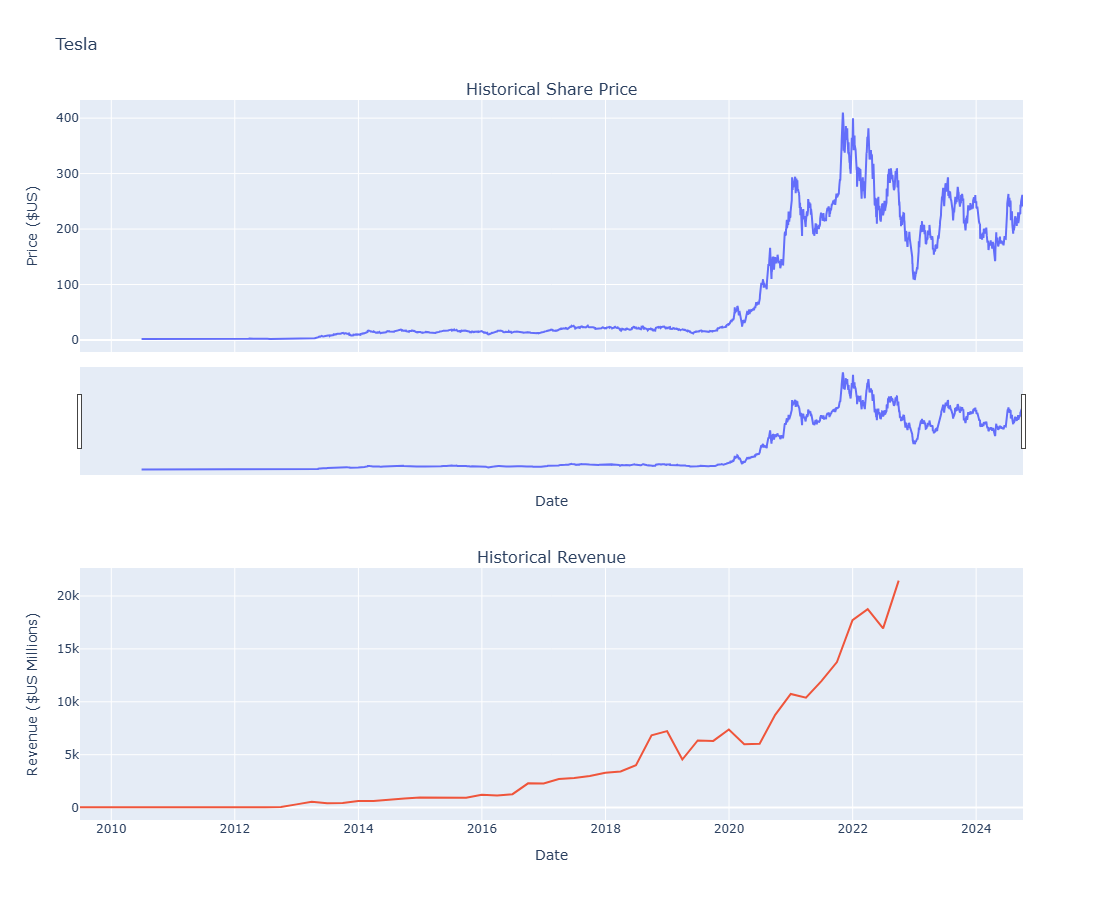

In [97]:
make_graph(tesla_data, tesla_revenue, "Tesla")

## Plot GameStop Stock Graph


In [88]:
make_graph(gme_data, gme_revenue, 'GameStop')

NameError: name 'gme_data' is not defined

<h2>Author:</h2> 

<a href="https://www.linkedin.com/in/thirumuruganmath/">Thirumurugan</a> Data Scientist
